Accuracy: 91.00%


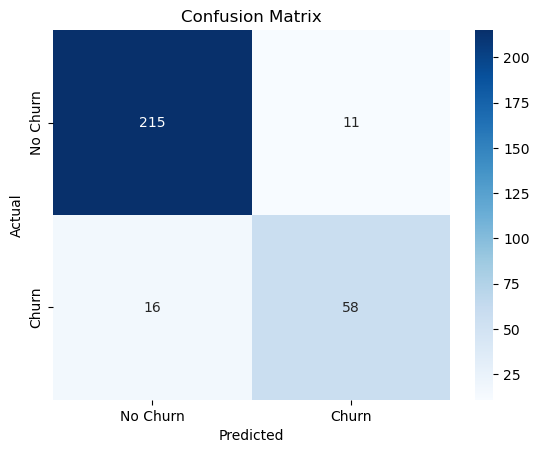

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('customer_churn_data.csv')

# Preprocessing the data
# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
for column in ['gender', 'subscription_type']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Features and target
X = df.drop(columns=['customer_id', 'churn'])
y = df['churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


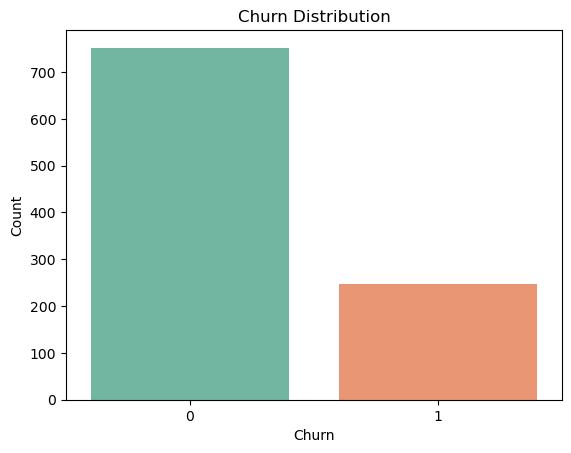

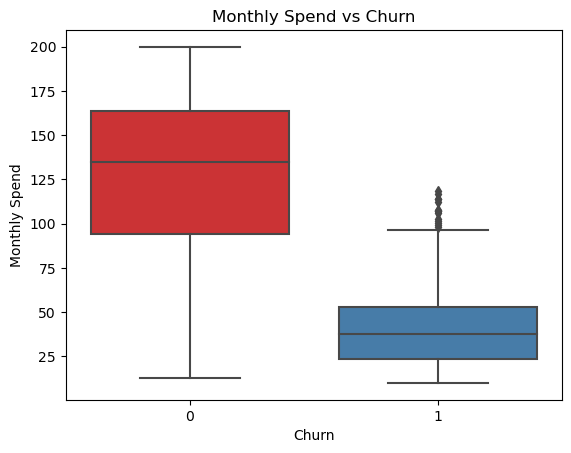

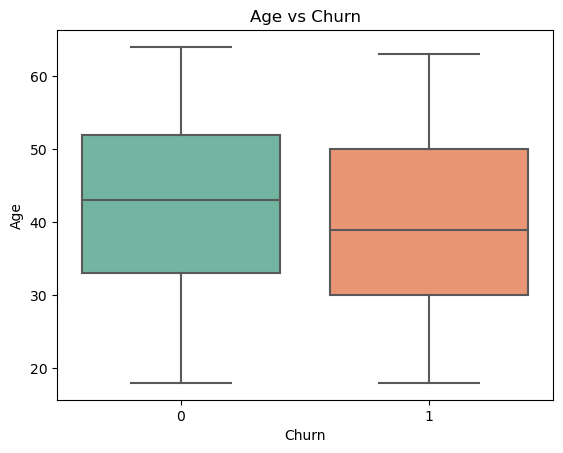

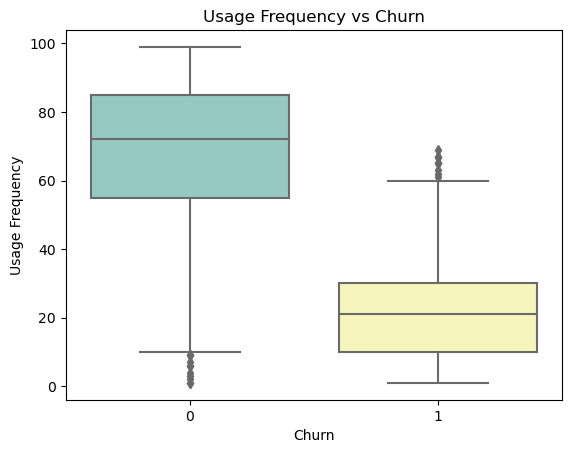

In [15]:
# Visualization 1: Churn distribution
sns.countplot(x='churn', data=df, palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Visualization 2: Monthly Spend vs Churn
sns.boxplot(x='churn', y='monthly_spend', data=df, palette='Set1')
plt.title('Monthly Spend vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Spend')
plt.show()

# Visualization 3: Age vs Churn
sns.boxplot(x='churn', y='age', data=df, palette='Set2')
plt.title('Age vs Churn')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.show()

# Visualization 4: Usage Frequency vs Churn
sns.boxplot(x='churn', y='usage_frequency', data=df, palette='Set3')
plt.title('Usage Frequency vs Churn')
plt.xlabel('Churn')
plt.ylabel('Usage Frequency')
plt.show()


In [16]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Function to preprocess and predict churn
def predict_churn(customer_data, model, label_encoders):
    # Preprocess the input customer data
    customer_data = customer_data.copy()

    # Convert categorical columns to numerical using the label encoders
    for column in ['gender', 'subscription_type']:
        le = label_encoders[column]
        customer_data[column] = le.transform([customer_data[column]])  # Ensure it's passed as a list
    
    # Make sure the customer data has the same columns as the training data
    feature_columns = ['age', 'gender', 'subscription_type', 'monthly_spend', 'usage_frequency']
    customer_data = pd.DataFrame([customer_data], columns=feature_columns)
    
    # Convert the DataFrame to the correct type (XGBoost expects float64 or category for categorical)
    customer_data = customer_data.astype({
        'age': 'float64',
        'gender': 'float64',
        'subscription_type': 'float64',
        'monthly_spend': 'float64',
        'usage_frequency': 'float64'
    })
    
    # Predict churn using the trained model
    prediction = model.predict(customer_data)
    return 'Churn' if prediction[0] == 1 else 'No Churn'

# Example: Define the new customer data
new_customer = {
    'age': 30,
    'gender': 'Female',
    'subscription_type': 'Premium',
    'monthly_spend': 120.5,
    'usage_frequency': 40
}

# Example of label encoders for 'gender' and 'subscription_type'
label_encoders = {
    'gender': LabelEncoder().fit(['Male', 'Female']),
    'subscription_type': LabelEncoder().fit(['Basic', 'Premium', 'Standard'])
}

# Example model (this should be your trained XGBoost model)
model = xgb.XGBClassifier()

# Example dataset to train the model
df = pd.DataFrame({
    'age': [30, 45, 25, 50, 60],
    'gender': ['Female', 'Male', 'Female', 'Male', 'Female'],
    'subscription_type': ['Premium', 'Basic', 'Standard', 'Premium', 'Basic'],
    'monthly_spend': [100, 50, 30, 200, 75],
    'usage_frequency': [20, 5, 15, 60, 25],
    'churn': [1, 0, 0, 1, 0]
})

# Label encoding for categorical features
df['gender'] = label_encoders['gender'].transform(df['gender'])
df['subscription_type'] = label_encoders['subscription_type'].transform(df['subscription_type'])

# Features and target variable
X = df.drop(columns=['churn'])
y = df['churn']

# Train the model
model.fit(X, y)

# Predict churn for the new customer
prediction = predict_churn(new_customer, model, label_encoders)
print(f"Prediction: {prediction}")


Prediction: No Churn
